In [2]:
# Libraries 

import pandas as pd
import numpy as np
import seaborn as sn 
import matplotlib.pyplot as plt 


In [3]:
df = pd.read_csv('D:/Machine Learning Dataset/SuperStore Sala/train.csv')
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
df.shape

(9800, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
df1 = df['Postal Code'].isnull().sum()
df1

11

In [7]:
df['Postal Code'].fillna(0,inplace = True)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [9]:
# convert from float to int 

df['Postal Code'] = df['Postal Code'].astype(int)
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int32  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [10]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


# Data Cleaning 

In [11]:
# using conditional statements

if df.duplicated().sum()>100:
    print("Duplicated are there")
else:
    print("No Dupilcated ")



No Dupilcated 


In [12]:
df.duplicated().sum()

0

# EDA
# Customer Segmentation

In [13]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [14]:
# type of Customers

df['Segment'].unique()



array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [15]:
#Count of Segmdnt
cs = df['Segment'].value_counts().reset_index()
cs = cs.rename(columns={'index':'Customers type ', 'Segment':'Total Customer'})
cs

,Customers type,Total Customer
0,Consumer,5101
1,Corporate,2953
2,Home Office,1746


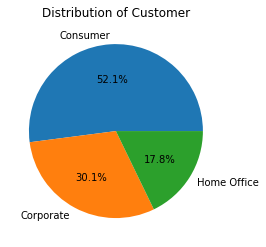

In [16]:
# Plotting in pie chart
plt.pie(cs['Total Customer'],labels=cs['Customers type '],autopct='%1.1f%%')
plt.title('Distribution of Customer')
plt.show()

# Customer and Sale 

In [17]:
sp = df.groupby('Segment')['Sales'].sum().reset_index()
sp = sp.rename(columns={ 'Segment':'Customers Type', 'Sales':'Total_Sales'})
sp

,Customers Type,Total_Sales
0,Consumer,1.148061e+06
1,Corporate,6.884941e+05
2,Home Office,4.249822e+05


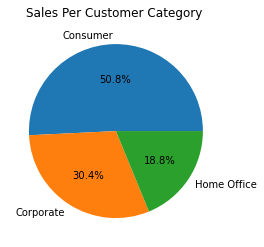

In [18]:
# Plotting in pie chart
plt.pie(sp['Total_Sales'],labels=sp['Customers Type'],autopct='%1.1f%%')
plt.title('Sales Per Customer Category ')
plt.show ()

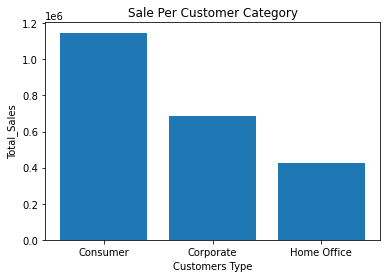

In [19]:
# Bar Graph 

plt.bar(sp['Customers Type'],sp['Total_Sales'])
plt.title('Sale Per Customer Category')
plt.xlabel('Customers Type')
plt.ylabel('Total_Sales')
plt.show()


# Customer layalty

In [20]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [21]:
# Group  data according to customer id, customer name, and calculate freq of their orders
customer_deatils = df.groupby(['Customer ID','Customer Name', 'Segment'])['Order ID'].count().reset_index()
customer_deatils.rename(columns={'Order ID':'Total_Order'},inplace=True)
count_detail = customer_deatils.sort_values(by='Total_Order',ascending=False)
count_detail.head(10)





,Customer ID,Customer Name,Segment,Total_Order
787,WB-21850,William Brown,Consumer,35
606,PP-18955,Paul Prost,Home Office,34
482,MA-17560,Matt Abelman,Home Office,34
387,JL-15835,John Lee,Consumer,33
147,CK-12205,Chloris Kastensmidt,Consumer,32
720,SV-20365,Seth Vernon,Consumer,32
349,JD-15895,Jonathan Doherty,Corporate,32
44,AP-10915,Arthur Prichep,Consumer,31
791,ZC-21910,Zuschuss Carroll,Consumer,31
275,EP-13915,Emily Phan,Consumer,31


In [22]:
count_detail

,Customer ID,Customer Name,Segment,Total_Order
787,WB-21850,William Brown,Consumer,35
606,PP-18955,Paul Prost,Home Office,34
482,MA-17560,Matt Abelman,Home Office,34
387,JL-15835,John Lee,Consumer,33
147,CK-12205,Chloris Kastensmidt,Consumer,32
...,...,...,...,...
681,SC-20845,Sung Chung,Consumer,1
456,LD-16855,Lela Donovan,Corporate,1
403,JR-15700,Jocasta Rupert,Consumer,1
637,RE-19405,Ricardo Emerson,Consumer,1


In [23]:
# Group data based on customer id , customer name, and sales

customer_sale=customer_deatils = df.groupby(['Customer ID','Customer Name'])['Sales'].sum().reset_index()
sale_order= customer_sale.sort_values(by='Sales',ascending=False)
sale_order


,Customer ID,Customer Name,Sales
700,SM-20320,Sean Miller,25043.050
741,TC-20980,Tamara Chand,19052.218
621,RB-19360,Raymond Buch,15117.339
730,TA-21385,Tom Ashbrook,14595.620
6,AB-10105,Adrian Barton,14473.571
...,...,...,...
508,MG-18205,Mitch Gastineau,16.739
145,CJ-11875,Carl Jackson,16.520
681,SC-20845,Sung Chung,14.112
456,LD-16855,Lela Donovan,5.304


# Mode of Shipping 


In [24]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [25]:
# Unique Ship mode
df['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [26]:
# Frequency use of shiping mode 
shipping_mode = df['Ship Mode'].value_counts().reset_index()
shipping_mode = shipping_mode.rename(columns={'index':'ModeShipment ', 'Ship Mode':'TotalCount'})
shipping_mode


,ModeShipment,TotalCount
0,Standard Class,5859
1,Second Class,1902
2,First Class,1501
3,Same Day,538


In [29]:
# Plotting in pie chart
#plt.pie(shipping_mode['TotalCount'],labels=shipping_mode['ModeShipment'],autopct='%1.1f%%')
#plt.title('Popular Shipping Method ')
#plt.show ()

# Graphical Analysis

In [32]:
# Customer by State
state = df['State'].value_counts().reset_index()
state = state.rename(columns ={'index':'State','State':'Number of Customer'})
state.head(5)

,State,Number of Customer
0,California,1946
1,New York,1097
2,Texas,973
3,Pennsylvania,582
4,Washington,504


In [33]:
# Customer by city
city = df['City'].value_counts().reset_index()
city = city.rename(columns ={'index':'City','City':'Number of Customer'})
city.head(5)

,City,Number of Customer
0,New York City,891
1,Los Angeles,728
2,Philadelphia,532
3,San Francisco,500
4,Seattle,426


In [39]:
# Sales per States
# Grouping state and sales
state_sales = df.groupby(['State'])['Sales'].sum().reset_index()

# Sorting starting from highest sates 
top_state = state_sales.sort_values(by = 'Sales',ascending = False)
top_state.head().reset_index(drop=True)


,State,Sales
0,California,446306.4635
1,New York,306361.1470
2,Texas,168572.5322
3,Washington,135206.8500
4,Pennsylvania,116276.6500


In [40]:
# Sales per city
# Grouping state and sales
city_sales = df.groupby(['City'])['Sales'].sum().reset_index()

# Sorting starting from highest sates 
top_city = city_sales.sort_values(by = 'Sales',ascending = False)
top_city.head().reset_index(drop=True)

,City,Sales
0,New York City,252462.547
1,Los Angeles,173420.181
2,Seattle,116106.322
3,San Francisco,109041.120
4,Philadelphia,108841.749


# Production Analysis 

In [41]:
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


In [42]:
# Type of Product Categoires 

products_category = df['Category'].unique()
products_category



array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [44]:
# group data by product category 

subcategory_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()

# sort by ascending order
subcategory_count = subcategory_count.sort_values(by ='Sub-Category',ascending = False)
subcategory_count


,Category,Sub-Category
1,Office Supplies,9
0,Furniture,4
2,Technology,4


In [45]:
# Sales per each Category 

category_sales = df.groupby(['Category'])['Sales'].sum().reset_index()

#sort by descending order
category_sales = category_sales.sort_values(by ='Sales',ascending = False)
category_sales

,Category,Sales
2,Technology,827455.8730
0,Furniture,728658.5757
1,Office Supplies,705422.3340


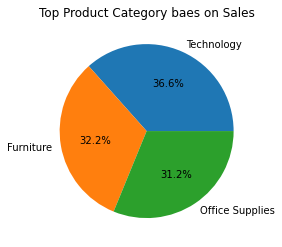

In [47]:
#plotting a pie chart 

plt.pie(category_sales['Sales'],labels=category_sales['Category'],autopct='%1.1f%%')

# setlabel
plt.title('Top Product Category baes on Sales')
plt.show()






In [50]:
# Group data by product sub-category vs sales

pt_sub = df.groupby(['Sub-Category'])['Sales'].sum().reset_index()

# Sorting in Descending Order 

top_pt_sub = pt_sub.sort_values(by='Sales',ascending= False)
top_pt_sub



,Sub-Category,Sales
13,Phones,327782.4480
5,Chairs,322822.7310
14,Storage,219343.3920
16,Tables,202810.6280
3,Binders,200028.7850
11,Machines,189238.6310
0,Accessories,164186.7000
6,Copiers,146248.0940
4,Bookcases,113813.1987
1,Appliances,104618.4030


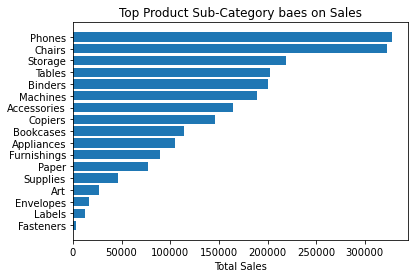

In [51]:
#plotting the Horizontal bar graph 

top_pt_sub= top_pt_sub.sort_values(by ='Sales',ascending = True)
plt.barh(top_pt_sub['Sub-Category'],top_pt_sub['Sales'])

#Labels
plt.title('Top Product Sub-Category baes on Sales')
plt.xlabel('Product Sub-Category ')
plt.xlabel('Total Sales')
plt.show()







# Sales

In [70]:
# Converting order  date to datetime format 

df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst=True)

# Group by year and summing the sales per years

year_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index()
year_sales = year_sales.rename(columns={'Order Date':'Year', 'Sales' :'Total Sales'})
year_sales



,Year,Total Sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


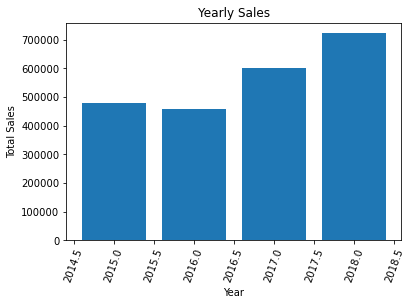

In [71]:
# Bar Graph 

plt.bar(year_sales['Year'],year_sales['Total Sales'])
# labels
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=70)
plt.show( )

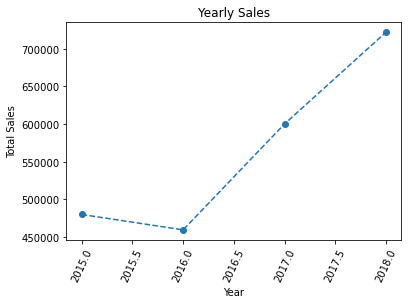

In [74]:
plt.plot(year_sales['Year'],year_sales['Total Sales'],marker='o',linestyle='--')

plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=65)
plt.show( )

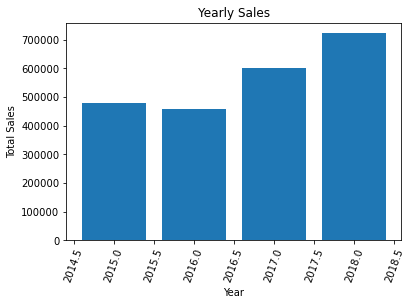

In [72]:
# Plotting Line Graph

plt.bar(year_sales['Year'],year_sales['Total Sales'], linestyle='--')
# labels
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=70)
plt.show( )

In [82]:
# Converting order  date to datetime format 

df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst=True)

# Filter Data According to years
year_sales = df[df['Order Date'].dt.year==2018]

# Calculates quartely sales for years 2018

qua_sales = year_sales.resample('Q', on = 'Order Date')['Sales'].sum()
qua_sales=qua_sales.reset_index()
qua_sales = qua_sales.rename(columns={'Order Date':'Quarters ', 'Sales' :'Total Sales'})
print('This are the Quartly sales for 2018')
qua_sales


This are the Quartly sales for 2018


,Quarters,Total Sales
0,2018-03-31,122260.8842
1,2018-06-30,127558.6200
2,2018-09-30,193815.8400
3,2018-12-31,278416.6750


In [85]:
#plt.plot(qua_sales['Quarters'],qua_sales['Total Sales'],marker='o',linestyle='--')

#plt.title('Quarterly Sales')
#plt.xlabel('Quarters')
#plt.ylabel('Total Sales')
#plt.xticks(rotation=65)
#plt.show()

# Monthly Sales trend for a year

In [88]:
# Converting order  date to datetime format 

df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst=True)

# Filter Data According to monthly
monthly_sales = df[df['Order Date'].dt.year==2018]

# Calculates quartely sales for years 2018\
monthly_sales = monthly_sales.resample('M', on = 'Order Date')['Sales'].sum()
monthly_sales=monthly_sales.reset_index()
monthly_sales = monthly_sales.rename(columns={'Order Date':'Month ', 'Sales' :'Total Monthly  Sales'})
print('This are the Monthly sales for 2018')
monthly_sales

This are the Monthly sales for 2018


,Month,Total Monthly Sales
0,2018-01-31,43476.4740
1,2018-02-28,19920.9974
2,2018-03-31,58863.4128
3,2018-04-30,35541.9101
4,2018-05-31,43825.9822
5,2018-06-30,48190.7277
6,2018-07-31,44825.1040
7,2018-08-31,62837.8480
8,2018-09-30,86152.8880
9,2018-10-31,77448.1312
